In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import itertools as it 

## TODO
+0 과 -0의 구분

+ itertools
    + 반복자 

+ set 자료형
    + 집합의 생각하면됨
    + 순서가 없고
    + 중복이 없다

$S_t \geq \max\{0, S_{t-1} + y_t + - E_{t-1}[Y_t]\} $

### GIVEN

```python
import itertools as it 

h=0.005
tmp = np.log(df.close).diff().fillna(0)

tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))

s1 = [index for index, value in enumerate(tmp_p) if value ==0]
s2 = [index for index, value in enumerate(tmp_n) if value ==0]

print(set(s1) & set(s2))

```

In [7]:
df = pd.read_csv('dollar_D_15.csv',index_col='timestamp')
df.columns=[['close']]
df.head()


,close
timestamp,
2018-11-21 09:02:00,266.149994
2018-11-21 09:06:00,266.100006
2018-11-21 09:11:00,266.200012
2018-11-21 09:19:00,266.350006
2018-11-21 09:33:00,266.100006


In [17]:
h=0.01
tmp = np.log(df.close).diff().fillna(0)
display(tmp)
tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))

s1 = [index for index, value in enumerate(tmp_p) if value ==0]
s2 = [index for index, value in enumerate(tmp_n) if value ==0]
print(set(s1) & set(s2))
a = set(s1) & set(s2)
type(a)

,close
timestamp,
2018-11-21 09:02:00,0.000000
2018-11-21 09:06:00,-0.000188
2018-11-21 09:11:00,0.000376
2018-11-21 09:19:00,0.000563
2018-11-21 09:33:00,-0.000939
2018-11-21 09:52:00,-0.001128
2018-11-21 10:14:00,0.000188
2018-11-21 10:29:00,0.001503
2018-11-21 10:36:00,0.002626


set()


set

https://docs.python.org/3.4/library/itertools.html

Iterator	|Arguments	|Results	|Example
---|---|---|---
accumulate()	|p [,func]	|p0, p0+p1, p0+p1+p2, ...	|accumulate([1,2,3,4,5]) --> 1 3 6 10 15

rough skeetch of accumulate

```python
def accumulate(inputs, func):
    itr = iter(inputs)
    prev = next(itr)
    for cur in itr:
        yield prev
        prev = func(prev, cur)
        ```

### 준비

,close
timestamp,
2019-06-07 12:19:00,269.600006
2019-06-07 13:20:00,268.850006
2019-06-07 14:08:00,268.149994
2019-06-07 14:34:00,267.200012
2019-06-07 15:01:00,266.950012


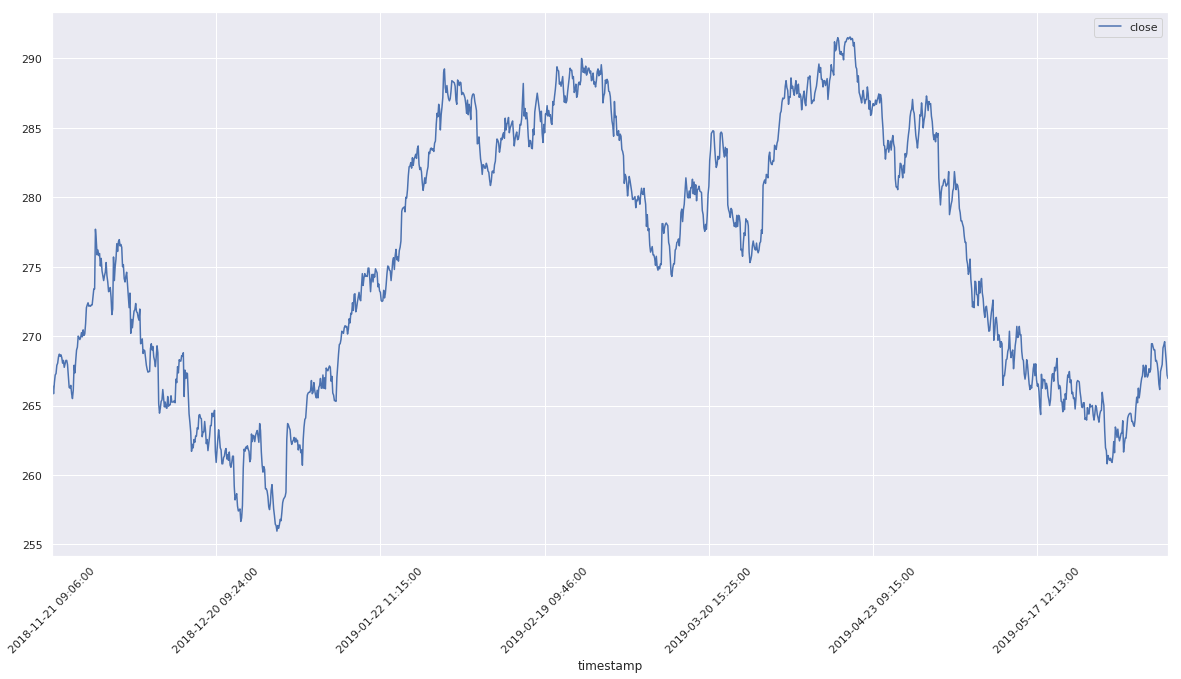

In [2]:

#bar = pd.read_csv('dollar_t5000000_d30.csv',index_col='timestamp')
bar = pd.read_csv('dollar_t5300000_d200.csv',index_col='timestamp')
bar = bar.drop(columns=['return'])

tmp = np.log(bar.close).diff().fillna(0)
display(bar.tail())
bar.plot(
    rot=45,
    figsize=(20,10)
)

## 생성

In [3]:
h=0.05 # filter size
tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
s1 = [index for index, value in enumerate(tmp_p) if value ==0]
s2 = [index for index, value in enumerate(tmp_n) if value ==0]



## 반환
+ [merging based on a timestamp which do not match exactly](https://stackoverflow.com/questions/34880539/pandas-merging-based-on-a-timestamp-which-do-not-match-exactly)

In [4]:
s_p = bar.iloc[s1]
s_m = bar.iloc[s2]

display(s_p.head())
display(s_m.head())

s_t = pd.concat([s_p,s_m],axis = 1,sort=True)
s_t.columns = ['s_p','s_m']
s_t.fillna(method='ffill',inplace=True)
s_t.head()
s_t.tail()

,close
timestamp,
2018-11-21 09:06:00,266.250000
2018-11-21 09:59:00,265.850006
2018-11-23 13:45:00,265.850006
2018-11-23 14:37:00,265.500000
2018-12-10 09:10:00,265.149994


,close
timestamp,
2018-11-21 09:06:00,266.250000
2018-11-21 09:22:00,266.399994
2018-11-21 09:59:00,265.850006
2018-11-21 10:34:00,266.649994
2018-11-21 10:53:00,267.200012


,s_p,s_m
2019-06-07 12:19:00,260.799988,269.600006
2019-06-07 13:20:00,260.799988,268.850006
2019-06-07 14:08:00,260.799988,268.149994
2019-06-07 14:34:00,260.799988,267.200012
2019-06-07 15:01:00,260.799988,266.950012


## 표시

,s_p,s_m
2019-06-07 12:19:00,260.799988,269.600006
2019-06-07 13:20:00,260.799988,268.850006
2019-06-07 14:08:00,260.799988,268.149994
2019-06-07 14:34:00,260.799988,267.200012
2019-06-07 15:01:00,260.799988,266.950012


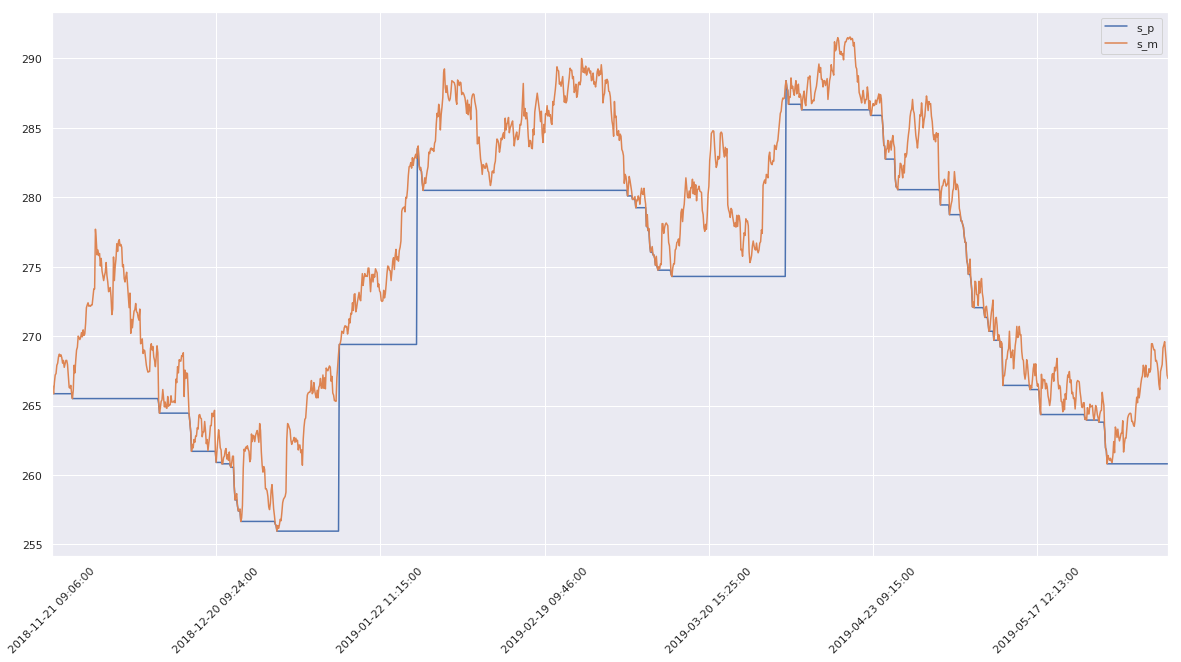

In [5]:
display(s_t.tail())
s_t.plot(
    use_index =True,
    subplots=False,
    sharex =True,
   # xlim=[s_t.index[0],s_t.index[-1]],
    rot =45,
    figsize=(20,10),

)

## 함수

In [6]:
def CUSUM(
    file,
    index='timestamp',
    col='close',
    h=0.05
   ):
    bar = pd.read_csv(file,index_col=index)
    bar = bar.drop(bar.columns.difference([col]), axis=1)
    tmp = np.log(bar.close).diff().fillna(0)
   
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value ==0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0]
        
    s_p = bar.iloc[s1]
    s_m = bar.iloc[s2]

    s_t = pd.concat([s_p,s_m],axis = 1,sort=True)
    s_t.columns = ['s_p','s_m']
    s_t.fillna(method='ffill',inplace=True)

    return s_t


In [ ]:
for h_t in [5,0.5,0.05,0.005]:
    s_t = CUSUM('dollar_t5300000_d200.csv',h=h_t)
    s_t.plot(
        use_index =True,
        subplots=False,
        sharex =True,
       # xlim=[s_t.index[0],s_t.index[-1]],
        rot =45,
        figsize=(20,10),
        title=h_t
    )

## 수정

In [ ]:


def CUSUM2(
    file,
    index='timestamp',
    col='close',
    h=0.05
   ):
    bar = pd.read_csv(file,index_col=index)
    bar = bar.drop(bar.columns.difference([col]), axis=1)
    tmp = np.log(bar.close).diff().fillna(0)
   
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value ==0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0]
        
    s_p = bar.iloc[s1]
    s_m = bar.iloc[s2]

    s_t = pd.concat([s_p,s_m],axis = 1,sort=True)
    s_t.columns = ['s_p','s_m']
    s_t.fillna(method='ffill',inplace=True)
    
    s_t['s_t'] = np.where(s_t['s_p'] > -s_t['s_m'],s_t['s_p'],s_t['s_m'])
    return s_t

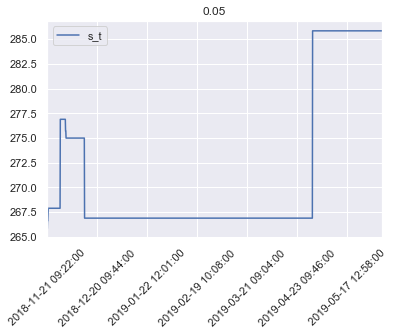

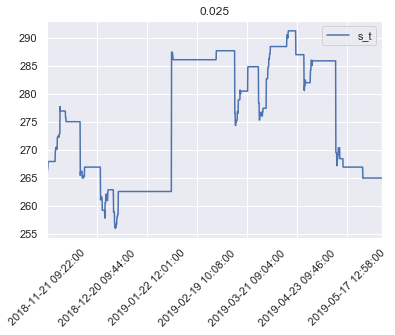

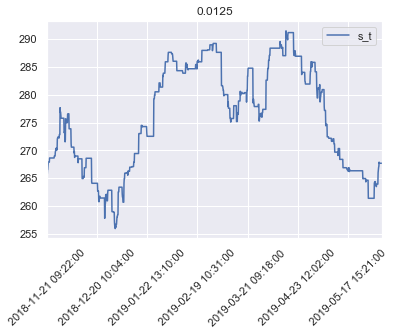

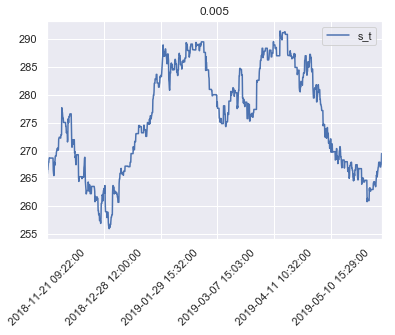

In [187]:
for h_t in [0.05,
            0.025,
            0.0125,
            0.005           
           ]:
    s_t = CUSUM2('dollar_t5300000_d200.csv',h=h_t)
    s_t = s_t.drop(columns=['s_p','s_m'])
    s_t.plot(
        use_index =True,
        subplots=False,
        sharex =True,
       # xlim=[s_t.index[0],s_t.index[-1]],
        rot =45,
        #figsize=(20,10),
        title=h_t
    )

In [24]:
def npMovingAverage(data, window=3):
    weights = np.ones(window) / window
    return np.convolve(data, weights, mode='valid')

def CUSUM3(
    file,
    index='timestamp',
    col='close',
    window=20,
    h=0.05
   ):
    bar = pd.read_csv(file,index_col=index)
    bar = bar.drop(bar.columns.difference([col]), axis=1)
    tmp = np.log(bar[col]).diff().fillna(0)
        
    ma = npMovingAverage(tmp,window)      
    tmp = tmp[window-1:]
    tmp = tmp - ma
    
    
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value !=0]
    s2 = [index for index, value in enumerate(tmp_n) if value !=0]
        
    s_p = bar.iloc[s1]
    s_n = bar.iloc[s2]
    

    s_t = pd.concat([s_p,s_n],axis = 1,sort=True)
    s_t.columns = ['s_p','s_n']
    
    s_t.fillna(method='ffill',inplace=True)

    s_t['s_t'] = np.where(s_t['s_p'] > -s_t['s_n'],s_t['s_p'],s_t['s_n'])
    return s_t

In [ ]:
for h_t in [0.0125,
            0.005           
           ]:
    window=100
    #s_t = CUSUM3('dollar_t5300000_d200.csv',h=h_t,window=window)
    s_t = CUSUM3('dollar_weekly_20.csv',h=h_t,window=window,col='price')
    #s_t = s_t.drop(columns=['s_p','s_m'])
    s_t.plot(
        use_index =True,
        subplots=False,
        sharex =True,
       # xlim=[s_t.index[0],s_t.index[-1]],
        rot =45,
        #figsize=(20,10),
        title='h=' + str(h_t) + ' | window='+str(window)
    )
    s_t = s_t.drop(columns=['s_p','s_n'])
    s_t.plot(
        use_index =True,
        subplots=False,
        sharex =True,
       # xlim=[s_t.index[0],s_t.index[-1]],
        rot =45,
        #figsize=(20,10),
        title='h=' + str(h_t) + ' | window='+str(window)
    )

In [6]:
h=0.5
f = lambda x, y: max(x+y, 0) if (x+y) < h else 0

f(0.02,0.1)

0.12000000000000001

In [83]:
def npMovingAverage(data, window=3):
    weights = np.ones(window) / window
    return np.convolve(data, weights, mode='valid')

def CUSUM4(
    file,
    index='timestamp',
    col='close',
    window=20,
    h=0.05
   ):
    bar = pd.read_csv(file,index_col=index)
    bar = bar.drop(bar.columns.difference([col]), axis=1)
    tmp = np.log(bar[col]).diff().fillna(0)
        
    ma = npMovingAverage(tmp,window)      
    tmp = tmp[window-1:]
    tmp = tmp - ma    
    
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) >= h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) <= -h else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value !=0]
    s2 = [index for index, value in enumerate(tmp_n) if value !=0]
        
    s_p = bar.iloc[s1]
    s_n = bar.iloc[s2]    
    
    s_t = pd.concat([s_p,s_n],axis = 1,sort=True)
    s_t.columns = ['s_p','s_n']
    
    s_t['s_t'] = s_t.apply(lambda x: x['s_n'] if pd.isna(x['s_p']) else x['s_p'],axis=1)

    return s_t

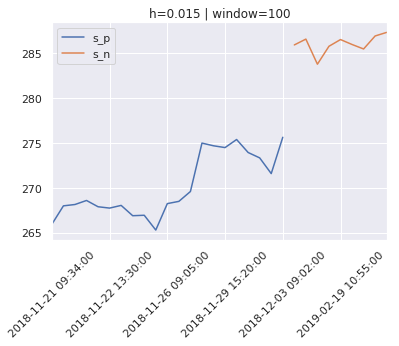

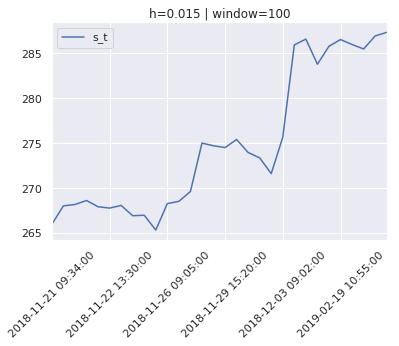

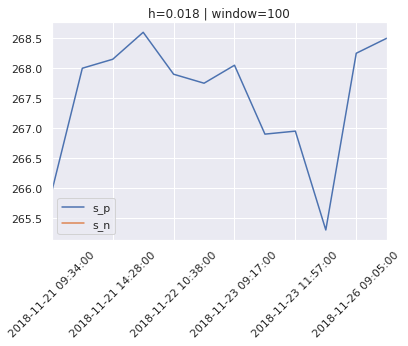

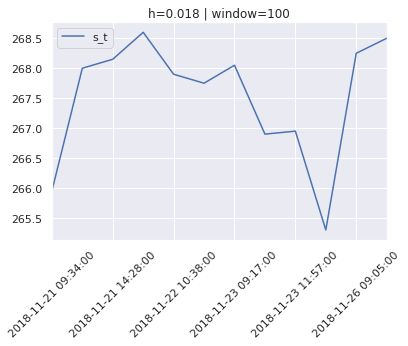

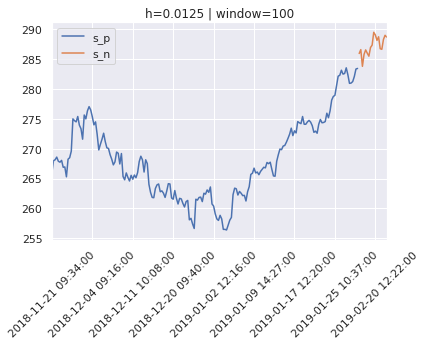

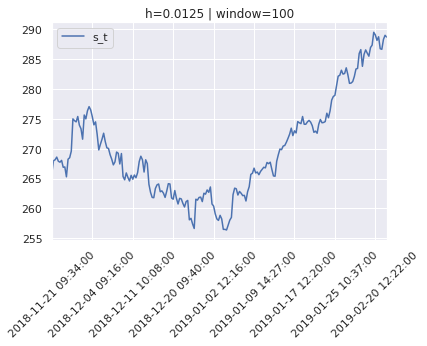

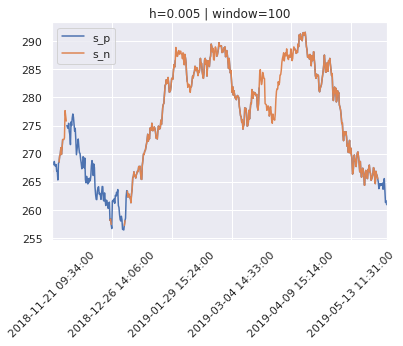

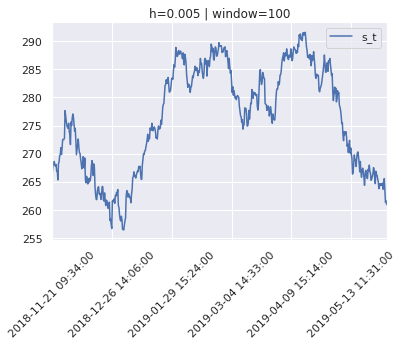

In [105]:
for h_t in [0.015,
            0.018,
            0.0125,
            0.005           
           ]:
    window=100
    #s_t = CUSUM3('dollar_t5300000_d200.csv',h=h_t,window=window)
    s_t = CUSUM4('dollar_weekly_20.csv',h=h_t,window=window,col='price')
    #s_t = s_t.drop(columns=['s_p','s_m'])
    s_t[['s_p','s_n']].plot(
        use_index =True,
        subplots=False,
        sharex =True,
        rot =45,
       # figsize=(20,10),
        title='h=' + str(h_t) + ' | window='+str(window)
    )
    
    s_t = s_t.drop(columns=['s_p','s_n'])
    s_t.plot(
        use_index =True,
        subplots=False,
        sharex =True,
        rot =45,
        #figsize=(20,10),
        title='h=' + str(h_t) + ' | window='+str(window)
    )
   
  

In [20]:
def CUSUM_dropna(
    df,
    col='close',
    h=0.05
   ):

   # tmp = np.log(df[col]).diff().fillna(0)
    tmp = np.log(df[col]).diff()
    tmp = tmp.dropna()
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))

    s1 = [index for index, value in enumerate(tmp_p) if value ==0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0]

    return (set(s1) & set(s2))

def CUSUM_fill(
    df,
    col='close',
    h=0.05
   ):

    tmp = np.log(df[col]).diff().fillna(0)
    tmp = tmp.dropna()
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))

    s1 = [index for index, value in enumerate(tmp_p) if value ==0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0]

    return (set(s1) & set(s2))

708

706

328

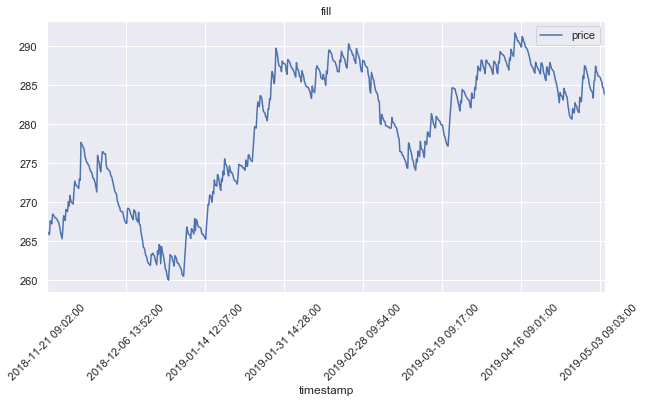

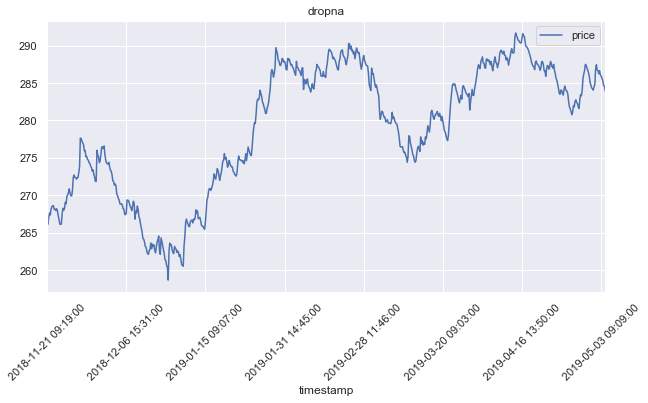

In [34]:
h_t = 0.00455
figsize=(10,5)
df = pd.read_csv('dollar_D_15.csv',index_col='timestamp')

cu3_set = CUSUM_fill(df,h=h_t,col='price')
cu3_list = np.sort(list(cu3_set),axis=0)
s_t_1 = df.iloc[cu3_list]

cu3_set = CUSUM_dropna(df,h=h_t,col='price')
cu3_list = np.sort(list(cu3_set),axis=0)
s_t_2 = df.iloc[cu3_list]

s_t_1.plot(
    use_index =True,
    subplots=False,
    sharex =True,
    rot =45,
    figsize=figsize,
    title='fill'
)
s_t_2.plot(
    use_index =True,
    subplots=False,
    sharex =True,
    rot =45,
    figsize=figsize,
    title='dropna' 
)

display(s_t_1.index.size)
display(s_t_2.index.size)
s_t_1[~s_t_1.index.isin(s_t_2.index)].index.size

In [232]:
def npMovingAverage(data, window=3):
    weights = np.ones(window) / window
    return np.convolve(data, weights, mode='valid')

def CUSUM_4(
    df,
    col='close',
    window=20,
    h=0.05
   ):
    bar = df.drop(df.columns.difference([col]), axis=1)
    tmp = np.log(bar[col]).diff().fillna(0)
        
    ma = npMovingAverage(tmp,window)  
    tmp = tmp[window-1:]
    tmp = tmp - ma
    display(ma)
    
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value ==0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0]

    bar = bar[window-1:]
    s_p = bar.iloc[s1]    
    s_n = bar.iloc[s2]    
    
    s_t = pd.concat([s_p,s_n],axis = 1,sort=True)
    s_t.columns = ['s_p','s_n']
   # display(s_t.head())
  #  s_t['s_t'] = s_t.apply(lambda x: x['s_n'] if pd.isna(x['s_p']) else x['s_p'],axis=1)
    
    return s_t

In [ ]:
def CUSUM_Triple(
    df,
    col='close',
    window=20,
   ):
    bar = df.drop(df.columns.difference([col]), axis=1)
    
    tmp = np.log(bar[col]).diff()
    tmp = tmp.dropna()
        
    ma = npMovingAverage(tmp,window)      
    tmp = tmp[window-1:]
    tmp = tmp - ma    
    
    dVol = getDailityVol(df,col_close='price')
    tmp_p = tmp - dVol
    tmp_n = tmp + dVol
    tmp_p = list(it.accumulate(tmp_p, lambda x, y: max(x+y, 0) if (x+y) < 0 else 0))
    tmp_n = list(it.accumulate(tmp_n, lambda x, y: min(x+y, 0) if (x+y) < 0 else 0))
    
    def verticalCheck(index,value):
        nonlocal prev_idx 
        nonlocal bar
        if(value !=0):
            return False
        # TODO 다듬어야함.
        t = pd.Timedelta(pd.to_datetime(bar.index[index]) - pd.to_datetime(prev_idx)).days
        #print(t)
        if(t < 1):
            return False        
        #print(t)
        prev_idx = bar.index[index]
        return True
    
    prev_idx = tmp.index[0]
    s1 = [index for index, value in enumerate(tmp_p) if value ==0 ]
    prev_idx = tmp.index[0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0 ]
    
    s_p = bar.iloc[s1]
    s_n = bar.iloc[s2]    
    
    s_t = pd.concat([s_p,s_n],axis = 1,sort=True)
    s_t.columns = ['s_p','s_n']
      
    return s_t
